25B4510

#🚀 Assignment 1: Predicting Vehicle Fuel Efficiency

**Objective**: Use your new Neural Network skills to predict a car's fuel efficiency (MPG) based on its characteristics (Horsepower, Weight, etc.)
##🛠️ Step 0: Setup & Data Loading

We will use the famous "Auto MPG" dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset from Seaborn
df = sns.load_dataset('mpg')

# Quick look at the data
print(df.head())

# Cleaning: Remove rows with missing values
df = df.dropna()

# We want to predict 'mpg' using these features:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
X = df[features]
y = df['mpg']

print(X.head())
print(y.head())


print("\n✅ Data Loaded and Cleaned!")

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
   cylinders  displacement  horsepower  weight  acceleration
0          8         307.0       130.0    3504          12.0
1          8         350.0       165.0    3693          11.5
2          8         318.0       150.0    3436          11.0
3          8         304.0       15

##🧹 Step 1: Pre-processing (The "Cleaning" Phase)

Neural Networks are very sensitive to the scale of numbers. If one column is 2000 (Weight) and another is 15 (Acceleration), the math gets messy. We need to **Normalize** the data.

###📝 Your Task:

Split the data into Training and Testing sets, then scale them.

In [ ]:
# 1. Split the data (80% Train, 20% Test)
# TODO: see the import code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scaling (Normalization)
scaler = StandardScaler()

# TODO: Fit the scaler on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Pre-processed!")

✅ Data Pre-processed!


##🧠 Step 2: Build Your Brain (Neural Network)

Now, design a Neural Network. Since this is a *Regression** problem (predicting a continuous number), your last layer should have 1 neuron with no activation.

###📝 Your Task:

Build a model with at least two hidden layers.

In [ ]:
# TODO: Define the Sequential model
model = Sequential([
    # Layer 1: Try 64 neurons with 'relu' activation
    Dense(64, activation='relu', input_shape=(len(features),)),

    # Layer 2: Try 32 neurons with 'relu' activation
    Dense(32, activation='relu'),

    # Output Layer: 1 neuron (for regression, no activation needed)
    Dense(1)
])

# TODO: Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

print("✅ Model Constructed!")
model.summary()

✅ Model Constructed!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

##🚀 Step 3: Training the Model

###📝 Your Task:

Train the model for 100 epochs.

In [ ]:
# TODO: Train the model using .fit()
# Remember to use the SCALED features (X_train_scaled)
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

print("✅ Training Complete!")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 23.3764 - val_loss: 24.8401
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1329 - val_loss: 24.4619
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2077 - val_loss: 24.0435
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.5723 - val_loss: 23.5537
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.3223 - val_loss: 22.9529
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.9160 - val_loss: 22.2076
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.6014 - val_loss: 21.2758
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.8976 - val_loss: 20.1056
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.6840 - val_loss: 18.7441
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.4826 - val_loss: 17.3656
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.6140 - val_loss: 15.8287
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.1

##📊 Step 4: Evaluation

Let's see if your AI is actually a good "Engineer."

###📝 Your Task:

Generate predictions and calculate the scores.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Final R2 Score: 0.6906
Mean Absolute Error: 2.93 MPG


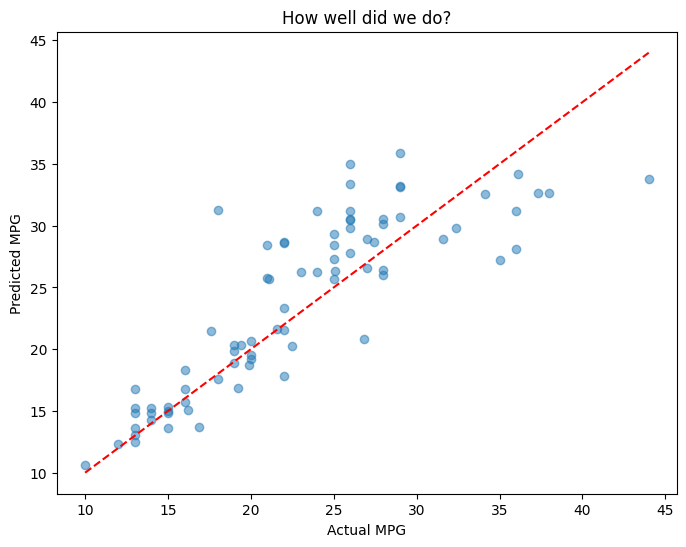

In [ ]:
# TODO: Calculate Prediction, R2 Score and MAE

# Make predictions on the scaled test data
predictions = model.predict(X_test_scaled)

# Calculate R2 Score
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print(f"Final R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f} MPG")

# Visualization: Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('How well did we do?')
plt.show()

##🌟 Bonus Challenge (For Sophies / Fast Learners)

1. **The "Brain Size" Test:** Go back and change the number of neurons to 128. Does the R2 score go up or down?

2. **The "Overfitting" Check:** Look at your training history. If your validation loss is much higher than your training loss, your model is memorizing! Try adding a Dropout layer.

Created with ❤️ for WiDS Project

# Bonus question 1


In [ ]:

model = Sequential([

    Dense(128, activation='relu', input_shape=(len(features),)),

    Dense(32, activation='relu'),

    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

print("✅ Model Constructed!")
model.summary()

✅ Model Constructed!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

print("✅ Training Complete!")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 22.9831 - val_loss: 24.6014
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.7624 - val_loss: 24.0503
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.2285 - val_loss: 23.4050
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.3304 - val_loss: 22.5656
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.4665 - val_loss: 21.4303
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.6197 - val_loss: 19.9211
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.2202 - val_loss: 17.9403
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.5312 - val_loss: 15.6079
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.7812 - val_loss: 13.0764
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7472 - val_loss: 10.3479
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4642 - val_loss: 7.8175
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

In [ ]:
predictions = model.predict(X_test_scaled)

r2 = r2_score(y_test, predictions)

mae = mean_absolute_error(y_test, predictions)

print(f"Final R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f} MPG")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Final R2 Score: 0.7007
Mean Absolute Error: 2.88 MPG


# Thus, the new r2 score (0.7007) is more than the previous one (0.6906)

Bonus question 2

  (with 128 neurons in the first layer)

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([

    Dense(128, activation='relu', input_shape=(len(features),)),

    Dense(32, activation='relu'),
    Dropout(0.2), # Added Dropout layer to address overfitting

    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

print("✅ Model Constructed!")
model.summary()

✅ Model Constructed!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

print("✅ Training Complete!")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 23.1790 - val_loss: 24.3780
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.5473 - val_loss: 23.7906
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2145 - val_loss: 23.0857
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.0343 - val_loss: 22.1897
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.0308 - val_loss: 21.0374
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.4973 - val_loss: 19.5400
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.0039 - val_loss: 17.9045
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.3189 - val_loss: 16.1508
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.0080 - val_loss: 14.1148
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.8196 - val_loss: 11.7698
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3083 - val_loss: 9.0943
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.873

Before the dropout layer was added


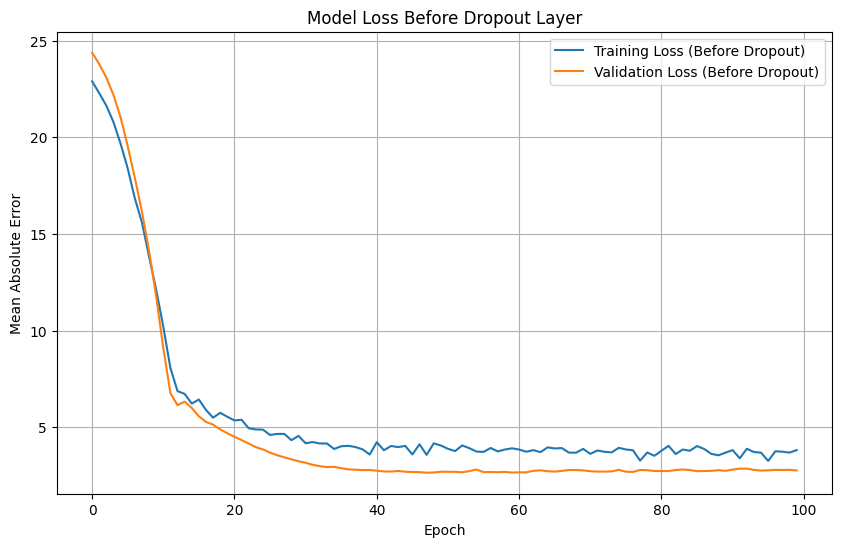

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (Before Dropout)')
plt.plot(history.history['val_loss'], label='Validation Loss (Before Dropout)')
plt.title('Model Loss Before Dropout Layer')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

After retraining the model with the Dropout layer


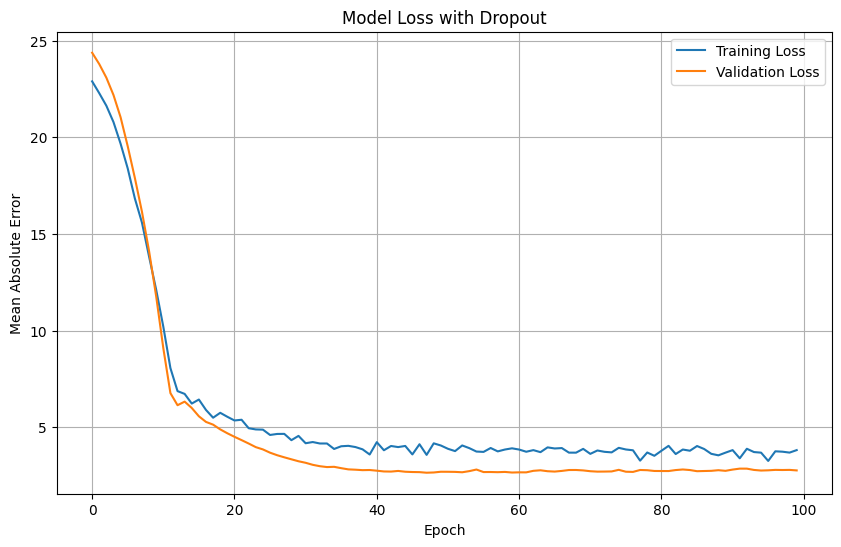

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()